In [2]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.datasets import make_gaussian_quantiles

In [19]:
N = 1000
quantiles = make_gaussian_quantiles(mean         = None,
                                    cov          =  0.1,
                                    n_samples    =    N,
                                    n_features   =    2,
                                    n_classes    =    2,
                                    shuffle      = True,
                                    random_state = None,
                                                        )

In [ ]:
help(make_gaussian_quantiles)

In [20]:
x, y = quantiles
y.shape

(1000,)

In [21]:
y = y[:, np.newaxis]

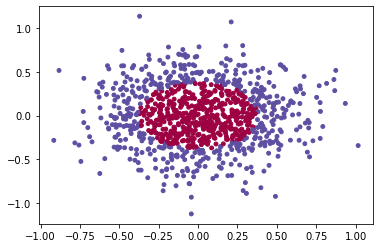

In [22]:
plt.scatter(x[:,0], x[:,1], c=y[:,0], s=15, cmap=plt.cm.Spectral )

Activation Functions:

In [37]:
def sigmoid(x, derivate=False):
    if derivate:
        return np.exp(-x)/((1+np.exp(-x))**2)
    return 1 / (1 + np.exp(-x))

def relu(x, derivate=False):
    if derivate:
        x[x <= 0] = 0
        x[x >  0] = 1
        return x
    return np.maximum(0,x)

Loss functions

In [24]:
def mse(y, y_hat, derivate=False):
    if derivate:
        return (y_hat - y)
    return np.mean((y_hat - y)**2)

Creating random parameters for the network layers

In [28]:
def initialize_parameters(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0,L-1):
        parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1])*2)-1 
        parameters['b'+str(l+1)] = (np.random.rand(      1      ,layers_dim[l+1])*2)-1 
    return parameters

In [29]:
layers_dim = [2,4,8,1]
params = initialize_parameters(layers_dim)
params

{'W1': array([[-0.83452061, -0.0133941 , -0.0218992 ,  0.15666644],
        [ 0.73836151, -0.3762137 , -0.96699051, -0.88813227]]),
 'b1': array([[-0.00601668,  0.53236712,  0.25825366,  0.04738734]]),
 'W2': array([[ 0.21839867, -0.13407794,  0.94608904, -0.54744973,  0.41325525,
         -0.92124103,  0.08395853,  0.71990728],
        [ 0.77644508,  0.67624881,  0.89532825,  0.47190366, -0.69661119,
         -0.63254188,  0.20782185, -0.26341168],
        [ 0.34191147, -0.19521093,  0.60788604, -0.6947921 , -0.23844678,
          0.54743236,  0.3079584 , -0.93313635],
        [ 0.16158601,  0.46774113, -0.35576012, -0.41520379,  0.48445053,
         -0.29604803,  0.23637736,  0.54086994]]),
 'b2': array([[-0.50238261, -0.32278724,  0.51074701,  0.77091031,  0.62605926,
         -0.69867881, -0.84368654,  0.56582528]]),
 'W3': array([[ 0.29329756],
        [ 0.39983644],
        [ 0.42336804],
        [-0.96648563],
        [ 0.34604592],
        [-0.58176405],
        [-0.9987168 ],


In [30]:
params['W1'].shape

(2, 4)

In [33]:
np.matmul(x,params['W1'])

array([[-0.37783537, -0.06515307, -0.16010451, -0.04319378],
       [-0.11126792,  0.08532761,  0.2185016 ,  0.18914185],
       [ 0.16496888, -0.09466686, -0.24302127, -0.21892603],
       ...,
       [-0.05861915,  0.13833666,  0.35247159,  0.28000897],
       [ 0.14349537,  0.00553556,  0.01198166, -0.02069548],
       [-0.17666477, -0.07888872, -0.197945  , -0.11372558]])

In [34]:
x@params['W1']

array([[-0.37783537, -0.06515307, -0.16010451, -0.04319378],
       [-0.11126792,  0.08532761,  0.2185016 ,  0.18914185],
       [ 0.16496888, -0.09466686, -0.24302127, -0.21892603],
       ...,
       [-0.05861915,  0.13833666,  0.35247159,  0.28000897],
       [ 0.14349537,  0.00553556,  0.01198166, -0.02069548],
       [-0.17666477, -0.07888872, -0.197945  , -0.11372558]])

Forward Training

In [38]:
params['A0'] = x

params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
params['A1'] = relu(params['Z1'])

params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
params['A2'] = relu(params['Z2'])

params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
params['A3'] = sigmoid(params['Z3'])

output = params['A3']

In [39]:
output

array([[0.66293346],
       [0.71095622],
       [0.72393578],
       [0.72895495],
       [0.67946311],
       [0.70320539],
       [0.78606758],
       [0.69932506],
       [0.68978382],
       [0.65879507],
       [0.7518282 ],
       [0.78475701],
       [0.70558242],
       [0.66214747],
       [0.71966584],
       [0.77348136],
       [0.66705376],
       [0.81573676],
       [0.67317422],
       [0.74964246],
       [0.77272997],
       [0.81958966],
       [0.71185992],
       [0.66508024],
       [0.7955563 ],
       [0.75668549],
       [0.69689337],
       [0.73627215],
       [0.70431371],
       [0.68652092],
       [0.67679467],
       [0.68367157],
       [0.72896182],
       [0.7750919 ],
       [0.88713178],
       [0.72787737],
       [0.77642356],
       [0.73496483],
       [0.72230954],
       [0.67208198],
       [0.7770816 ],
       [0.80017337],
       [0.68287125],
       [0.66787378],
       [0.66815649],
       [0.75266148],
       [0.6747006 ],
       [0.663